# Relaxation Effect Research

In [2]:
import numpy as np
import pandas as pd
import librosa, librosa.display 
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [12]:
# path  = "E:/RESEARCH/Datasets/breathe/normal/"
# path  = "E:/RESEARCH/Datasets/breathe/weak/"
path  = "E:/RESEARCH/Datasets/breathe/strong/"
fname = "1.wav"

fs, data = wavfile.read(path + fname)

print(fs, data.shape)
print(data)

48000 (2880512,)
[ 0  0  0 ... -1 -1 -1]


In [13]:
data.shape

(2880512,)

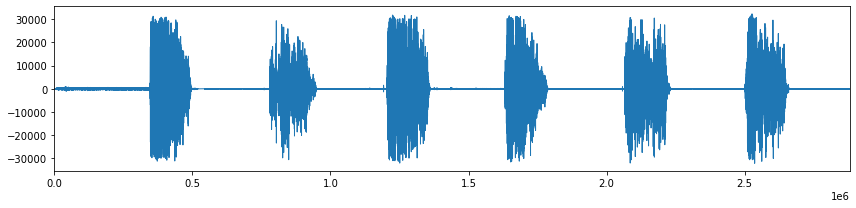

In [14]:
plt.figure(figsize = (12, 3))
plt.plot(data, lw = 1)
# plt.xlabel("sample")
# plt.ylabel("data")
plt.xlim(0, len(data))
plt.tight_layout()

In [13]:
# load audio file with Librosa
sig, sr = librosa.load(path + fname, sr=22050)

print(sig,sig.shape)

[ 0.0000000e+00 -1.5258789e-05  0.0000000e+00 ...  1.6784668e-04
 -1.8615723e-03 -4.1809082e-03] (660751,)


In [15]:
FIG_SIZE=(15,10)
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(sig, sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

AttributeError: module 'librosa.display' has no attribute 'waveplot'

<Figure size 1080x720 with 0 Axes>

In [ ]:
fft = np.fft.fft(sig)

# 복소공간 값 절댓갑 취해서, magnitude 구하기
magnitude = np.abs(fft) 

# Frequency 값 만들기
f = np.linspace(0,sr,len(magnitude))

# 푸리에 변환을 통과한 specturm은 대칭구조로 나와서 high frequency 부분 절반을 날려고 앞쪽 절반만 사용한다.
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
# STFT -> spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")